Rows: 299
Columns: 13
$ age                      <dbl> 75, 55, 65, 50, 65, 90, 75, 60, 65, 80, 75, 6…
$ anaemia                  <int> 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, …
$ creatinine_phosphokinase <int> 582, 7861, 146, 111, 160, 47, 246, 315, 157, …
$ diabetes                 <int> 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, …
$ ejection_fraction        <int> 20, 38, 20, 20, 20, 40, 15, 60, 65, 35, 38, 2…
$ high_blood_pressure      <int> 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, …
$ platelets                <dbl> 265000, 263358, 162000, 210000, 327000, 20400…
$ serum_creatinine         <dbl> 1.90, 1.10, 1.30, 1.90, 2.70, 2.10, 1.20, 1.1…
$ serum_sodium             <int> 130, 136, 129, 137, 116, 132, 137, 131, 138, …
$ sex                      <int> 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, …
$ smoking                  <int> 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, …
$ time                     <int> 4, 6, 7, 7, 8, 8, 10, 10, 10, 10, 10, 10, 11,…
$ DEATH_EVENT     

age                  anaemia creatinine_phosphokinase 
                       0                        0                        0 
                diabetes        ejection_fraction      high_blood_pressure 
                       0                        0                        0 
               platelets         serum_creatinine             serum_sodium 
                       0                        0                        0 
                     sex                  smoking                     time 
                       0                        0                        0 
             DEATH_EVENT 
                       0


Call:
glm(formula = DEATH_EVENT ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1456  -0.5192  -0.2067   0.4349   2.5128  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               1.146e+01  8.746e+00   1.311  0.18994    
age                       5.045e-02  2.251e-02   2.242  0.02498 *  
anaemia                   5.930e-01  4.902e-01   1.210  0.22638    
creatinine_phosphokinase  2.422e-04  2.326e-04   1.041  0.29775    
diabetes                  5.785e-01  4.772e-01   1.212  0.22539    
ejection_fraction        -6.165e-02  2.169e-02  -2.843  0.00447 ** 
high_blood_pressure      -3.372e-01  5.145e-01  -0.655  0.51226    
platelets                -6.991e-07  2.549e-06  -0.274  0.78388    
serum_creatinine          8.751e-01  3.898e-01   2.245  0.02477 *  
serum_sodium             -8.658e-02  6.144e-02  -1.409  0.15879    
sex                      -3.191e-01  5.365e-01  -0

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 104  17
         1  15  43
                                          
               Accuracy : 0.8212          
                 95% CI : (0.7571, 0.8744)
    No Information Rate : 0.6648          
    P-Value [Acc > NIR] : 2.348e-06       
                                          
                  Kappa : 0.5955          
                                          
 Mcnemar's Test P-Value : 0.8597          
                                          
            Sensitivity : 0.8739          
            Specificity : 0.7167          
         Pos Pred Value : 0.8595          
         Neg Pred Value : 0.7414          
             Prevalence : 0.6648          
         Detection Rate : 0.5810          
   Detection Prevalence : 0.6760          
      Balanced Accuracy : 0.7953          
                                          
       'Positive' Class : 0               
                              

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 74 10
         1 10 26
                                          
               Accuracy : 0.8333          
                 95% CI : (0.7544, 0.8951)
    No Information Rate : 0.7             
    P-Value [Acc > NIR] : 0.0005955       
                                          
                  Kappa : 0.6032          
                                          
 Mcnemar's Test P-Value : 1.0000000       
                                          
            Sensitivity : 0.8810          
            Specificity : 0.7222          
         Pos Pred Value : 0.8810          
         Neg Pred Value : 0.7222          
             Prevalence : 0.7000          
         Detection Rate : 0.6167          
   Detection Prevalence : 0.7000          
      Balanced Accuracy : 0.8016          
                                          
       'Positive' Class : 0               
                                    

[1] "prediction"
attr(,"package")
[1] "ROCR"

A prediction instance
  with 120 data points

[[1]]
[1] 0.8680556

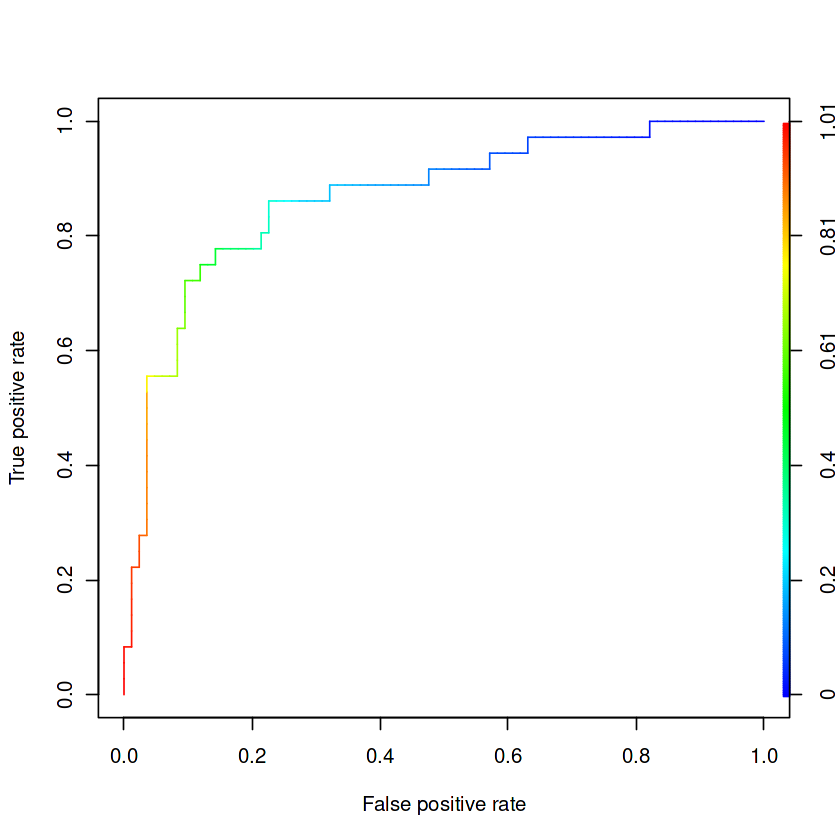

In [4]:
#First, let's load the sexy data and take a look at it
data <- read.csv("/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")
library(dplyr)  #this library let's us use the sexy glimpse function to "peak" at our data
glimpse(data)

sapply(data, function(x) sum(is.na(x)))

#Next, create a train and test data set using a 60% split.  This # is arbitrary.
dt = sort(sample(nrow(data), nrow(data)*.6))
train <- data[dt,]
test <- data[-dt,]

#Let's create our first model using the train data set.
train_model <- glm(DEATH_EVENT ~ ., data = train, family = "binomial")
summary(train_model)

#Next, we create our predictions below.  
#Note that I create a threshold of .5
results <- train %>% 
  mutate(pred_prob_model = predict(train_model, newdata = train, type = "response")) %>% 
  mutate(pred_outcome_model = ifelse(pred_prob_model >= 0.5, 1,0))


#Now, let's convert "DEATH_EVENT" and our outcomes to factors.
results$DEATH_EVENT <- as.factor(results$DEATH_EVENT)
results$pred_outcome_model <- as.factor(results$pred_outcome_model)

#the confusionMatrix() takes the prediction first, and the actual results second
library(caret)  #this library has the confusionMatrix() function
confusionMatrix(results$pred_outcome_model, results$DEATH_EVENT)




#Let's create the predictions 
final_results <- test %>% 
  mutate(pred_prob_model = predict(train_model, newdata = test, type = "response")) %>% 
  mutate(pred_outcome_model = ifelse(pred_prob_model >= 0.5, 1,0)) 

#Let's turn the "DEATH_EVENT" and the "pred_outcome_model" to factors 
final_results$DEATH_EVENT <- as.factor(final_results$DEATH_EVENT)
final_results$pred_outcome_model <- as.factor(final_results$pred_outcome_model)

#Let's see how our model did with the test data set
confusionMatrix(final_results$pred_outcome_model, final_results$DEATH_EVENT)

#Let's create a sexy ROC chart to see how we did.
#First, we create a prediction object in R.
library(ROCR)
pred <- prediction(final_results$pred_prob_model, final_results$DEATH_EVENT) 
class(pred)
pred

#Next let's plot the ROC Curve
perf <- performance(pred, "tpr", "fpr") # tpr and fpr are true and false positive rates
plot(perf, colorize=T)


#Finally, let's see the area under the ROC curve.  
auc.perf <-  performance(pred, measure = "auc")
auc.perf@y.values  